In [3]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict
from dotenv import load_dotenv
import os
from langchain.chat_models import init_chat_model

In [4]:
load_dotenv()
model = init_chat_model("openai/gpt-oss-120b",model_provider="groq")

In [5]:
#State

class LLMState(TypedDict):
    question: str
    answer: str


In [6]:
def llm_qa(state: LLMState)-> LLMState:
    #extract the question from state
    question = state['question']
    
    #form a prompt
    prompt = f"Answer the following question in 1-2 lines {question}"
    
    #ask the question to the LLM
    answer = model.invoke(prompt).content
    
    #update the answer in state
    state['answer']=answer
    
    return state

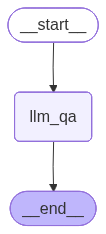

In [7]:
#graph 
graph = StateGraph(LLMState)

#nodes
graph.add_node("llm_qa",llm_qa)

#add edges
graph.add_edge(START,"llm_qa")
graph.add_edge("llm_qa",END)

#compile
workflow = graph.compile()

workflow


In [12]:
#execute
intial_state = {'question':"who invented OpenAI"}
final_state = workflow.invoke(intial_state)

print(final_state['answer'])


OpenAI was founded in December 2015 by a group of tech leaders including Elon Musk, Sam Altman, Greg Brockman, Ilya Sutskever, John Schulman, and Wojciech Zaremba.
